<a href="https://colab.research.google.com/github/kotharisoumil/Info_Alchemists/blob/main/DTSC_1302_Group_20_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Imports
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [11]:
url = "https://raw.githubusercontent.com/kotharisoumil/Info_Alchemists/refs/heads/main/adult.data"
column_headers = [
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race", "sex",
    "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"
]
df = pd.read_csv(url, names=column_headers)
df.head(20)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [13]:
# Count occurrences of '?' (with or without surrounding whitespace)
question_mark_count = (df.map(lambda x: str(x).strip()) == '?').sum().sum()
print("Total '?' in dataset:", question_mark_count)

Total '?' in dataset: 4262


In [12]:
# Identify columns containing '?' (with or without surrounding whitespace)
columns_with_question_marks = df.map(lambda x: str(x).strip()).eq('?').sum()

# Filter columns with at least one '?'
columns_with_question_marks = columns_with_question_marks[columns_with_question_marks > 0]
print("Columns with '?':")
print(columns_with_question_marks)

Columns with '?':
workclass         1836
occupation        1843
native_country     583
dtype: int64


In [24]:
# Remove rows with '?' in the 'occupation' column (accounting for whitespace)
df['occupation'] = df['occupation'].str.strip().replace('?', pd.NA)
df_cleaned1 = df.dropna(subset=['occupation'])
df_cleaned2 = df_cleaned1.loc[:, ["age", "occupation", "sex", "education", "income"]]
df_cleaned2

,age,occupation,sex,education,income
0,39,Adm-clerical,Male,Bachelors,<=50K
1,50,Exec-managerial,Male,Bachelors,<=50K
2,38,Handlers-cleaners,Male,HS-grad,<=50K
3,53,Handlers-cleaners,Male,11th,<=50K
4,28,Prof-specialty,Female,Bachelors,<=50K
...,...,...,...,...,...
32556,27,Tech-support,Female,Assoc-acdm,<=50K
32557,40,Machine-op-inspct,Male,HS-grad,>50K
32558,58,Adm-clerical,Female,HS-grad,<=50K
32559,22,Adm-clerical,Male,HS-grad,<=50K


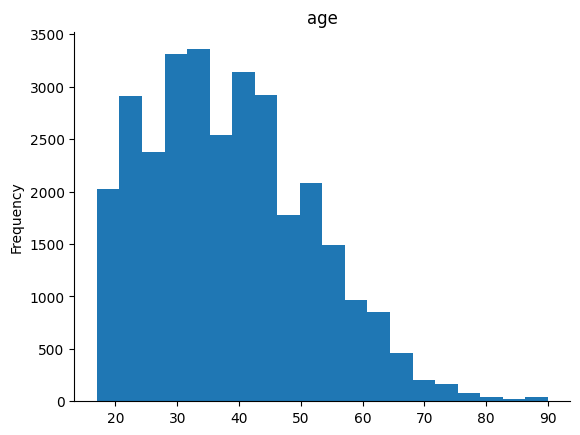

In [21]:
df_cleaned2['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

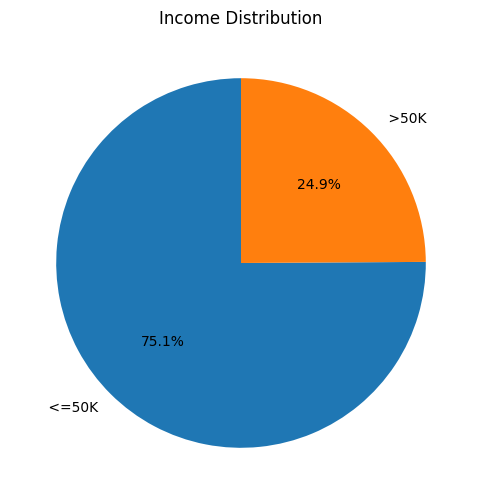

In [26]:
# Assuming your data is in a pandas DataFrame called 'df_cleaned2'
income_counts = df_cleaned2['income'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=90)
_ = plt.title('Income Distribution')